In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import urllib
from scipy import stats as st
from pprint import pprint

# Import API key
#from api_keys import api_key
api_key = "9ee211d38ba22671de8ce657efe6a7fb"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# define units
units = "imperial"

In [17]:
# List for holding latitude,longitude and cities
lat = []
lng = []
cities = []
country = []

# check with the user how many unique cities would like to explore weather conditions
city_size = int(input("Please enter how many cities you would like to explore weather: "))

# Create a set of random lat and lng combinations using random function

for i in range (0,city_size):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
    
for i in range(len(lat)):
    cities.append(citipy.nearest_city(lat[i],lng[i]).city_name)
len(cities)

Please enter how many cities you would like to explore weather: 500


500

In [18]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Start retrieving data     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Start retrieving data     
-----------------------------
Processing Record 1 of Set 1 | puertollano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=puertollano
Processing Record 2 of Set 1 | catuday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=catuday
Processing Record 3 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=chuy
Processing Record 4 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=kapaa
Processing Record 5 of Set 1 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=norman%20wells
Processing Record 6 of Set 1 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=fortuna
Processing Record 7 of Set 1 | ho

Processing Record 4 of Set 2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 2 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=bud
Processing Record 6 of Set 2 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=clyde%20river
Processing Record 7 of Set 2 | fernley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=fernley
Processing Record 8 of Set 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=rikitea
Processing Record 9 of Set 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=rikitea
Processing Record 10 of Set 2 | tuktoyaktuk
http://a

Processing Record 7 of Set 3 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=barrow
Processing Record 8 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=yellowknife
Processing Record 9 of Set 3 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=kutum
Processing Record 10 of Set 3 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=cape%20town
Processing Record 11 of Set 3 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=geraldton
Processing Record 12 of Set 3 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=bluff
Processing Record 13 of Set 3 | allanmyo
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 10 of Set 4 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=bredasdorp
Processing Record 11 of Set 4 | homestead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=homestead
Processing Record 12 of Set 4 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=jamestown
Processing Record 13 of Set 4 | tokonou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=tokonou
Processing Record 14 of Set 4 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=new%20norfolk
Processing Record 15 of Set 4 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=ushuaia
Processing Record 16 of Set 4 | rikitea
http://api.openweathermap.org/

Processing Record 13 of Set 5 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=bredasdorp
Processing Record 14 of Set 5 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=mataura
Processing Record 15 of Set 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=saldanha
Processing Record 16 of Set 5 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=atuona
Processing Record 17 of Set 5 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=rikitea
Processing Record 18 of Set 5 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=albany
Processing Record 19 of Set 5 | port alfred
http://api.openweathermap.org/data/2.5/weather

Processing Record 18 of Set 6 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=mataura
Processing Record 19 of Set 6 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=rio%20gallegos
Processing Record 20 of Set 6 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=hermanus
Processing Record 21 of Set 6 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=tabou
Processing Record 22 of Set 6 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=ushuaia
Processing Record 23 of Set 6 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=muros
Processing Record 24 of Set 6 | san policarpo
http://api.openweathermap.org/data/2.5/wea

Processing Record 22 of Set 7 | natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=natal
Processing Record 23 of Set 7 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=namibe
Processing Record 24 of Set 7 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=butaritari
Processing Record 25 of Set 7 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=kodiak
Processing Record 26 of Set 7 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=barentsburg
City not found. Skipping...
Processing Record 27 of Set 7 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=avarua
Processing Record 28 of Set 7 | hobart
http://api.openweatherm

Processing Record 25 of Set 8 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=kaitangata
Processing Record 26 of Set 8 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=saint-joseph
Processing Record 27 of Set 8 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=mys%20shmidta
City not found. Skipping...
Processing Record 28 of Set 8 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=hithadhoo
Processing Record 29 of Set 8 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=carnarvon
Processing Record 30 of Set 8 | doume
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=doume
City not found. Skipping...
Processi

Processing Record 27 of Set 9 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=umzimvubu
City not found. Skipping...
Processing Record 28 of Set 9 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=cockburn%20town
Processing Record 29 of Set 9 | buluang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=buluang
Processing Record 30 of Set 9 | maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=maragogi
Processing Record 31 of Set 9 | rubizhne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=rubizhne
Processing Record 32 of Set 9 | lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=lethem
Processing Record 33 of Set 9 | bluff
http://a

Processing Record 30 of Set 10 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=carnarvon
Processing Record 31 of Set 10 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=georgetown
Processing Record 32 of Set 10 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=atuona
Processing Record 33 of Set 10 | tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=tabuk
Processing Record 34 of Set 10 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=vaini
Processing Record 35 of Set 10 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ee211d38ba22671de8ce657efe6a7fb&q=mataura
Processing Record 36 of Set 10 | kruisfontein
http://api.openweathermap.org/data/2.5/wea

In [19]:
# convert city data to a dataframe
city_data_df=pd.DataFrame(city_data)

In [40]:
# display the top 5 rows
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puertollano,100,ES,1565562977,29,38.69,-4.11,71.01,3.00
1,catuday,100,PH,1565562978,78,16.29,119.81,84.05,21.07
2,chuy,75,UY,1565562978,90,-33.69,-53.46,50.93,8.59
3,kapaa,1,US,1565562979,62,22.08,-159.32,87.80,10.29
4,norman wells,90,CA,1565562979,71,65.28,-126.83,53.60,10.29


In [41]:
# export to csv format
city_data_df.to_csv("/Users/balasubramanianganapathyr/Desktop/SMU_new/Github_Homework/html-challenge/Output/Images/city.csv",header=True)

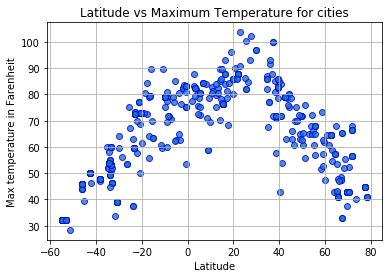

In [54]:
# create Latitude Vs Temperature plot
x=city_data_df['Lat']
y=city_data_df['Max Temp']
plt.scatter(x,y,edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Plot label properties
plt.xlabel('Latitude')
plt.ylabel('Max temperature in Farenheit')
plt.title("Latitude vs Maximum Temperature for cities")
plt.grid(True)
# Plot save fig
plt.savefig("/Users/balasubramanianganapathyr/Desktop/SMU_new/Github_Homework/html-challenge/Output/Images/Lat_Temp.png")

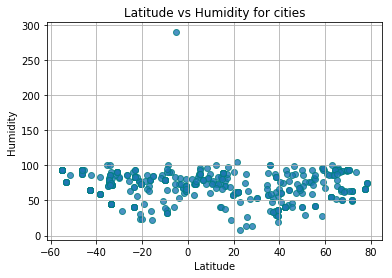

In [55]:
# create Latitude Vs Humidity plot
x=city_data_df['Lat']
y=city_data_df['Humidity']
plt.scatter(x,y,edgecolor="teal", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Plot label properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity for cities")
plt.grid(True)
# Plot save fig
plt.savefig("/Users/balasubramanianganapathyr/Desktop/SMU_new/Github_Homework/html-challenge/Output/Lat_Humd.png")

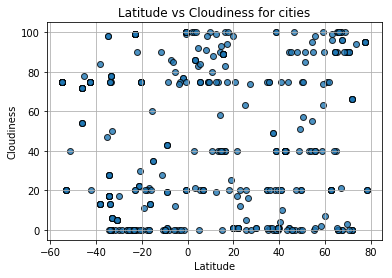

In [57]:
# create Latitude Vs Cloudiness plot
x=city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.scatter(x,y,edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Plot label properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness for cities")
plt.grid(True)
# Plot save fig
plt.savefig("/Users/balasubramanianganapathyr/Desktop/SMU_new/Github_Homework/html-challenge/Output/Images/Lat_Cloud.png")

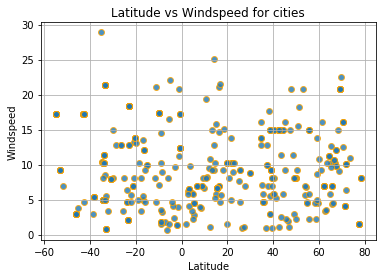

In [58]:
# create Latitude Vs Windspeed plot
x=city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.scatter(x,y,edgecolor="orange", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Plot label properties
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Latitude vs Windspeed for cities")
plt.grid(True)
# Plot save fig
plt.savefig("/Users/balasubramanianganapathyr/Desktop/SMU_new/Github_Homework/html-challenge/Output/Images/Lat_Wind.png")